Fourier Transform

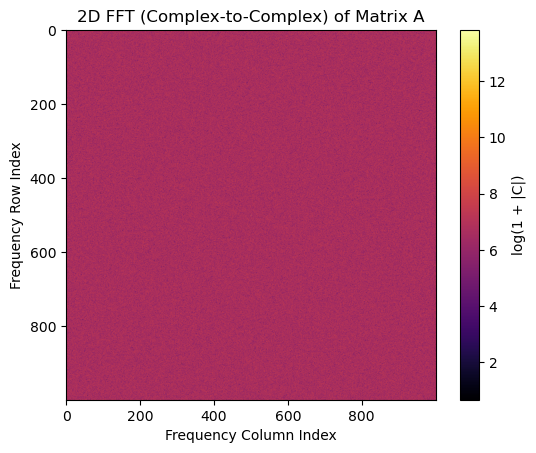

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate A (if not already defined)
A = np.random.normal(loc=1.0, scale=1.0, size=(1000, 1000))

# Step 2: Perform complex-to-complex 2D FFT
C = np.fft.fft2(A)

# Step 3: Shift zero-frequency component to the center
C_shifted = np.fft.fftshift(C)
#rint (C, C_shifted)
magnitude_spectrum = np.abs(C_shifted)

# Display the log-magnitude spectrum
plt.imshow(np.log1p(magnitude_spectrum), cmap='inferno')
plt.colorbar(label="log(1 + |C|)")
plt.title("2D FFT (Complex-to-Complex) of Matrix A")
plt.xlabel("Frequency Column Index")
plt.ylabel("Frequency Row Index")
plt.show()


In [9]:
import numpy as np

# Create original matrix A
A = np.random.normal(loc=1.0, scale=1.0, size=(1000, 1000))

# Forward FFT
C = np.fft.fft2(A)

# Inverse FFT
A_reconstructed = np.fft.ifft2(C).real  # keep only real part

# Compute absolute and relative errors
abs_error = np.abs(A - A_reconstructed)
rel_error = np.abs((A - A_reconstructed) / A)

# Mean and median squared errors
mean_sq_abs_err = np.mean(abs_error ** 2)
median_sq_abs_err = np.median(abs_error ** 2)

mean_sq_rel_err = np.mean(rel_error ** 2)
median_sq_rel_err = np.median(rel_error ** 2)

# Root of mean/median squared errors
rms_abs = np.sqrt(mean_sq_abs_err)
rmds_abs = np.sqrt(median_sq_abs_err)

rms_rel = np.sqrt(mean_sq_rel_err)
rmds_rel = np.sqrt(median_sq_rel_err)

# Print results
print("✅ Reconstruction Accuracy:")
print(f"RMS absolute error:      {rms_abs:.16e}")
print(f"RMdS absolute error:     {rmds_abs:.16e}")
print(f"RMS relative error:      {rms_rel:.16e}")
print(f"RMdS relative error:     {rmds_rel:.16e}")


✅ Reconstruction Accuracy:
RMS absolute error:      5.4321870120803429e-16
RMdS absolute error:     4.4408920985006262e-16
RMS relative error:      1.0193191740958579e-12
RMdS relative error:     3.6039556008495895e-16


In [7]:
import numpy as np

# Generate a real-valued matrix A
A = np.random.normal(loc=1.0, scale=1.0, size=(1000, 1000))

# Perform real-to-complex 2D FFT
R = np.fft.rfft2(A)

# Show shape and some values
print("Shape of R:", R.shape)
print("R (first 3x3 block):")
print(R[:3, :3])


Shape of R: (1000, 501)
R (first 3x3 block):
[[ 1.00043433e+06   +0.j          2.95803943e+02 -797.74603775j
   4.40255389e+02 +290.08506646j]
 [-6.54580675e+02 -622.67522895j  4.23391688e+01 -623.5075116j
  -6.71545534e+01 -250.52808696j]
 [ 5.20714995e+01+1782.9262491j   8.79387710e+00 +237.46114808j
  -9.49932603e+02 -698.99771519j]]


In [8]:
import numpy as np

# Step 1: Generate real-valued matrix A
A = np.random.normal(loc=1.0, scale=1.0, size=(1000, 1000))

# Step 2: Perform r2c FFT
R = np.fft.rfft2(A)

# Step 3: Reconstruct using inverse real-to-complex FFT
A_reconstructed = np.fft.irfft2(R, s=A.shape)

# Step 4: Compute absolute and relative errors
abs_error = np.abs(A - A_reconstructed)
rel_error = np.abs((A - A_reconstructed) / A)

# Step 5: Compute mean/median squared errors
mean_sq_abs_err = np.mean(abs_error**2)
median_sq_abs_err = np.median(abs_error**2)

mean_sq_rel_err = np.mean(rel_error**2)
median_sq_rel_err = np.median(rel_error**2)

# Step 6: Take square roots (RMS and RMdS)
rms_abs = np.sqrt(mean_sq_abs_err)
rmds_abs = np.sqrt(median_sq_abs_err)

rms_rel = np.sqrt(mean_sq_rel_err)
rmds_rel = np.sqrt(median_sq_rel_err)

# Step 7: Report
print("✅ Reconstruction Accuracy from r2c + irfft2:")
print(f"RMS absolute error:      {rms_abs:.16e}")
print(f"RMdS absolute error:     {rmds_abs:.16e}")
print(f"RMS relative error:      {rms_rel:.16e}")
print(f"RMdS relative error:     {rmds_rel:.16e}")


✅ Reconstruction Accuracy from r2c + irfft2:
RMS absolute error:      6.2473803066766666e-16
RMdS absolute error:     4.4408920985006262e-16
RMS relative error:      1.0273324646825601e-12
RMdS relative error:     4.0478586231473352e-16


Reducing the dimensions to 6 by 6 and obtaining matrix C from R. [fft2(A)->C & fft2(A)->R) and lastly reconstructing C from R]

In [1]:
import numpy as np

# Step 1: Create small 6x6 matrix
A = np.random.normal(loc=1.0, scale=1.0, size=(6, 6))

# Step 2: Compute full complex FFT (C) and real-to-complex FFT (R)
C = np.fft.fft2(A)
R = np.fft.rfft2(A)

# Step 3: Reconstruct full spectrum C_reconstructed from R
# R contains columns [0 ... N//2], i.e., 0 to 3 (inclusive) for N=6
M, N = A.shape
C_reconstructed = np.zeros((M, N), dtype=np.complex128)

# Copy non-redundant part directly
C_reconstructed[:, :N//2+1] = R

# Fill in the conjugate symmetric part
# Use Hermitian symmetry: C[m, N-n] = conj(C[M-m, n]) for n = 1 to N//2-1
for m in range(M):
    for n in range(1, N//2):
        C_reconstructed[m, N - n] = np.conj(R[(M - m) % M, n])

# Optional: compare to original C
print("Original C (rounded):\n", np.round(C, 2))
print("\nReconstructed C (rounded):\n", np.round(C_reconstructed, 2))

# Check reconstruction error
error = np.abs(C - C_reconstructed)
print("\nMax error between C and C_reconstructed:", np.max(error))


Original C (rounded):
 [[41.55+0.j    5.09-1.39j  4.84-1.44j -2.14-0.j    4.84+1.44j  5.09+1.39j]
 [-1.16-3.46j  2.01+3.54j  4.5 -0.33j  2.87-3.3j  -1.97-6.52j -3.89-7.47j]
 [-0.39+1.12j -3.87+0.5j  -1.68-2.09j -5.45-2.72j  5.6 -4.88j  3.2 -3.96j]
 [-4.14-0.j   -1.67-7.62j -3.5 -5.76j -3.2 -0.j   -3.5 +5.76j -1.67+7.62j]
 [-0.39-1.12j  3.2 +3.96j  5.6 +4.88j -5.45+2.72j -1.68+2.09j -3.87-0.5j ]
 [-1.16+3.46j -3.89+7.47j -1.97+6.52j  2.87+3.3j   4.5 +0.33j  2.01-3.54j]]

Reconstructed C (rounded):
 [[41.55+0.j    5.09-1.39j  4.84-1.44j -2.14+0.j    4.84+1.44j  5.09+1.39j]
 [-1.16-3.46j  2.01+3.54j  4.5 -0.33j  2.87-3.3j  -1.97-6.52j -3.89-7.47j]
 [-0.39+1.12j -3.87+0.5j  -1.68-2.09j -5.45-2.72j  5.6 -4.88j  3.2 -3.96j]
 [-4.14+0.j   -1.67-7.62j -3.5 -5.76j -3.2 +0.j   -3.5 +5.76j -1.67+7.62j]
 [-0.39-1.12j  3.2 +3.96j  5.6 +4.88j -5.45+2.72j -1.68+2.09j -3.87-0.5j ]
 [-1.16+3.46j -3.89+7.47j -1.97+6.52j  2.87+3.3j   4.5 +0.33j  2.01-3.54j]]

Max error between C and C_reconstructed: 4.44